In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv('C:/Users/DELL/Downloads/Bank_marketing_part1_Data.csv')

In [3]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [5]:
df.isna().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [6]:
df.shape

(210, 7)

In [7]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [8]:
len(df.columns)

7

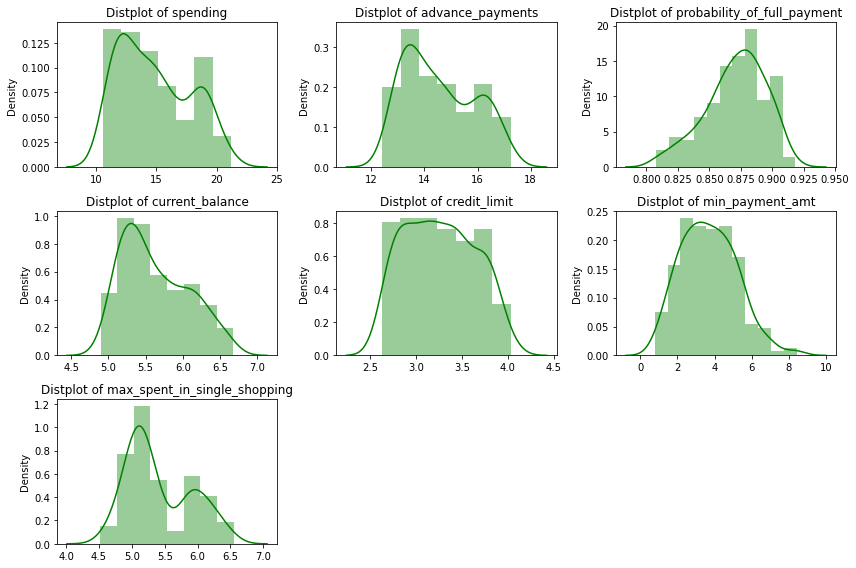

In [9]:
plt.figure(figsize = (12,8))
New_df = df.columns
for i in range(len(New_df)):
    plt.subplot(3, 3, i + 1)
    sns.distplot(x = df[New_df[i]],color='green')
    plt.title('Distplot of {}'.format(New_df[i]))
    plt.tight_layout()

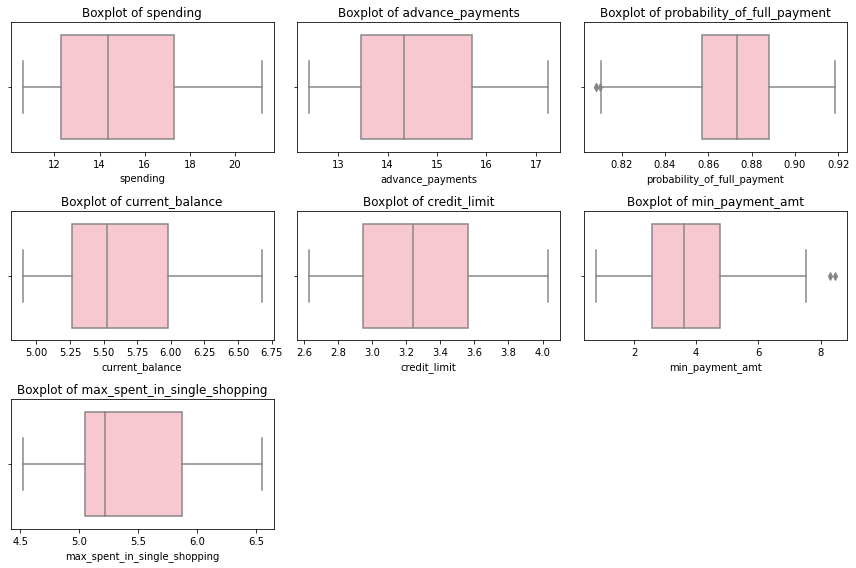

In [10]:
plt.figure(figsize = (12,8))
New_df = df.columns
for i in range(len(New_df)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x = df[New_df[i]],color='Pink')
    plt.title('Boxplot of {}'.format(New_df[i]))
    plt.tight_layout()

In [11]:
Q1=df['spending'].quantile(q=0.25)
Q3=df['spending'].quantile(q=0.75)
print('spending - 1st Quartile (Q1) is: ',Q1)
print('spending - 3st Quartile (Q3) is: ',Q3)
LL=Q1-1.5*(Q3-Q1)
UL=Q3+1.5*(Q3-Q1)
print('Lower outliers in spending: ',LL)
print('Upper outliers in spending: ',UL)

spending - 1st Quartile (Q1) is:  12.27
spending - 3st Quartile (Q3) is:  17.305
Lower outliers in spending:  4.717499999999999
Upper outliers in spending:  24.8575


In [12]:
Q1=df['advance_payments'].quantile(q=0.25)
Q3=df['advance_payments'].quantile(q=0.75)
print('advance_payments - 1st Quartile (Q1) is: ',Q1)
print('advance_payments - 3st Quartile (Q3) is: ',Q3)
LL=Q1-1.5*(Q3-Q1)
UL=Q3+1.5*(Q3-Q1)
print('Lower outliers in advance_payments: ',LL)
print('Upper outliers in advance_payments: ',UL)

advance_payments - 1st Quartile (Q1) is:  13.45
advance_payments - 3st Quartile (Q3) is:  15.715
Lower outliers in advance_payments:  10.052499999999998
Upper outliers in advance_payments:  19.1125


In [13]:
Q1=df['probability_of_full_payment'].quantile(q=0.25)
Q3=df['probability_of_full_payment'].quantile(q=0.75)
print('probability_of_full_payment - 1st Quartile (Q1) is: ',Q1)
print('probability_of_full_payment - 3st Quartile (Q3) is: ',Q3)
LL=Q1-1.5*(Q3-Q1)
UL=Q3+1.5*(Q3-Q1)
print('Lower outliers in probability_of_full_payment: ',LL)
print('Upper outliers in probability_of_full_payment: ',UL)

probability_of_full_payment - 1st Quartile (Q1) is:  0.8569
probability_of_full_payment - 3st Quartile (Q3) is:  0.887775
Lower outliers in probability_of_full_payment:  0.8105875
Upper outliers in probability_of_full_payment:  0.9340875


In [14]:
Q1=df['current_balance'].quantile(q=0.25)
Q3=df['current_balance'].quantile(q=0.75)
print('current_balance - 1st Quartile (Q1) is: ',Q1)
print('current_balance - 3st Quartile (Q3) is: ',Q3)
LL=Q1-1.5*(Q3-Q1)
UL=Q3+1.5*(Q3-Q1)
print('Lower outliers in current_balance: ',LL)
print('Upper outliers in current_balance: ',UL)

current_balance - 1st Quartile (Q1) is:  5.26225
current_balance - 3st Quartile (Q3) is:  5.97975
Lower outliers in current_balance:  4.186
Upper outliers in current_balance:  7.056000000000001


In [15]:
Q1=df['credit_limit'].quantile(q=0.25)
Q3=df['credit_limit'].quantile(q=0.75)
print('credit_limit - 1st Quartile (Q1) is: ',Q1)
print('credit_limit - 3st Quartile (Q3) is: ',Q3)
LL=Q1-1.5*(Q3-Q1)
UL=Q3+1.5*(Q3-Q1)
print('Lower outliers in credit_limit: ',LL)
print('Upper outliers in credit_limit: ',UL)

credit_limit - 1st Quartile (Q1) is:  2.944
credit_limit - 3st Quartile (Q3) is:  3.56175
Lower outliers in credit_limit:  2.017375
Upper outliers in credit_limit:  4.488375


In [16]:
Q1=df['min_payment_amt'].quantile(q=0.25)
Q3=df['min_payment_amt'].quantile(q=0.75)
print('min_payment_amt - 1st Quartile (Q1) is: ',Q1)
print('min_payment_amt - 3st Quartile (Q3) is: ',Q3)
LL=Q1-1.5*(Q3-Q1)
UL=Q3+1.5*(Q3-Q1)
print('Lower outliers in min_payment_amt: ',LL)
print('Upper outliers in min_payment_amt: ',UL)

min_payment_amt - 1st Quartile (Q1) is:  2.5615
min_payment_amt - 3st Quartile (Q3) is:  4.76875
Lower outliers in min_payment_amt:  -0.7493749999999992
Upper outliers in min_payment_amt:  8.079625


In [17]:
Q1=df['max_spent_in_single_shopping'].quantile(q=0.25)
Q3=df['max_spent_in_single_shopping'].quantile(q=0.75)
print('max_spent_in_single_shopping - 1st Quartile (Q1) is: ',Q1)
print('max_spent_in_single_shopping - 3st Quartile (Q3) is: ',Q3)
LL=Q1-1.5*(Q3-Q1)
UL=Q3+1.5*(Q3-Q1)
print('Lower outliers in max_spent_in_single_shopping: ',LL)
print('Upper outliers in max_spent_in_single_shopping: ',UL)

max_spent_in_single_shopping - 1st Quartile (Q1) is:  5.045
max_spent_in_single_shopping - 3st Quartile (Q3) is:  5.877
Lower outliers in max_spent_in_single_shopping:  3.797
Upper outliers in max_spent_in_single_shopping:  7.125


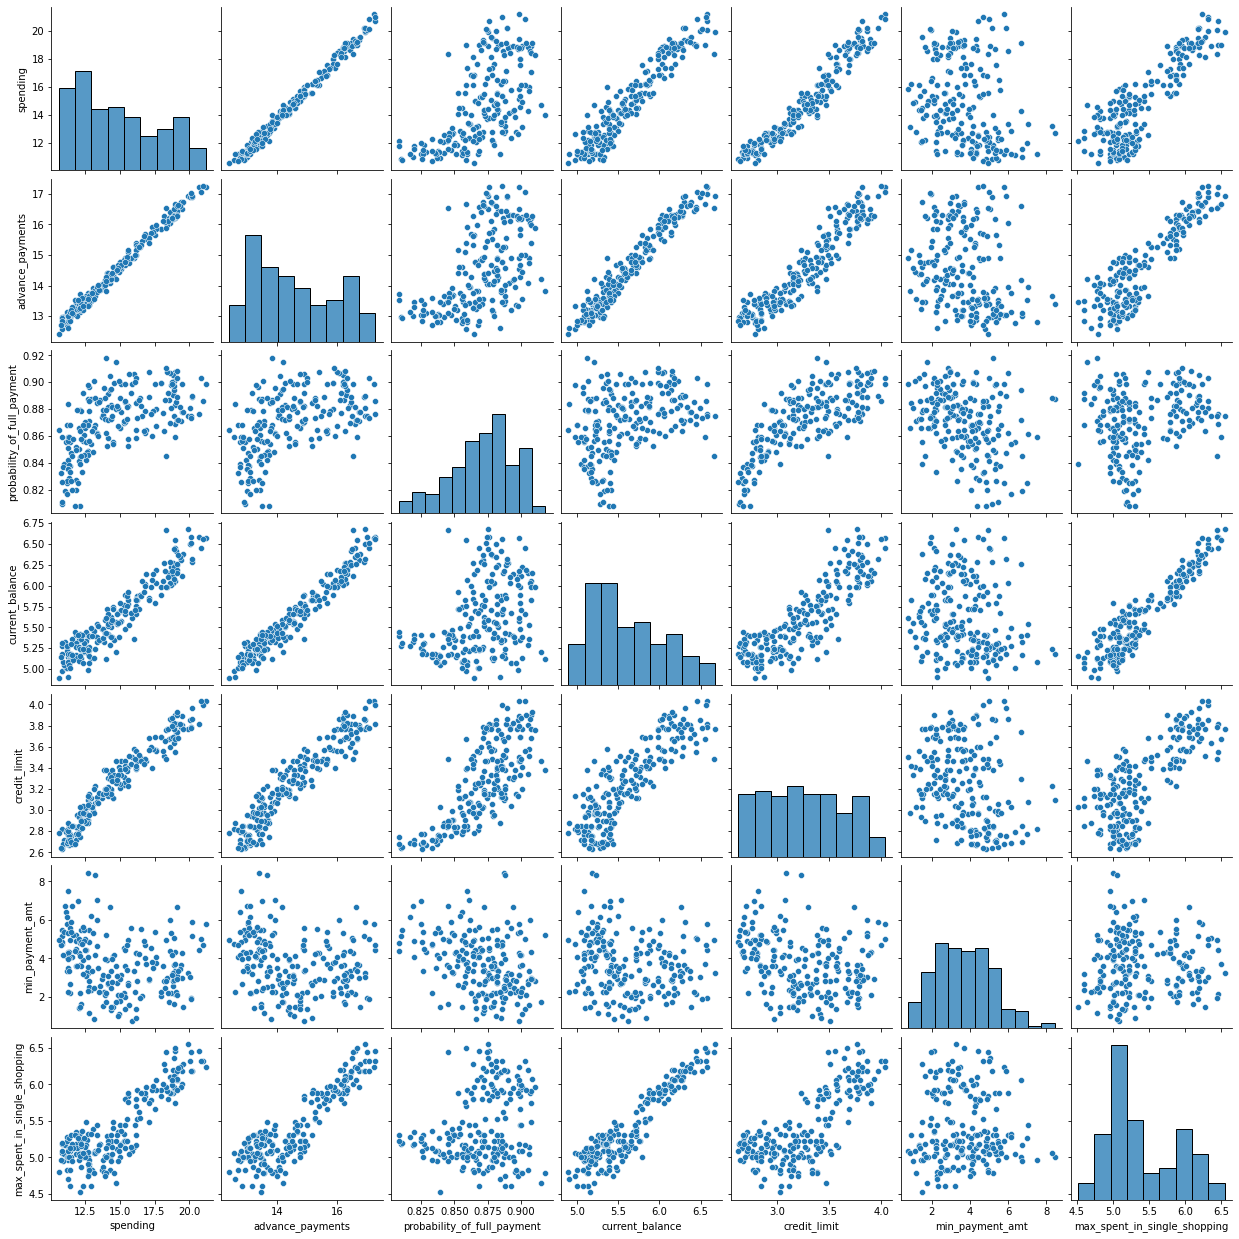

In [18]:
sns.pairplot(df)
plt.show()

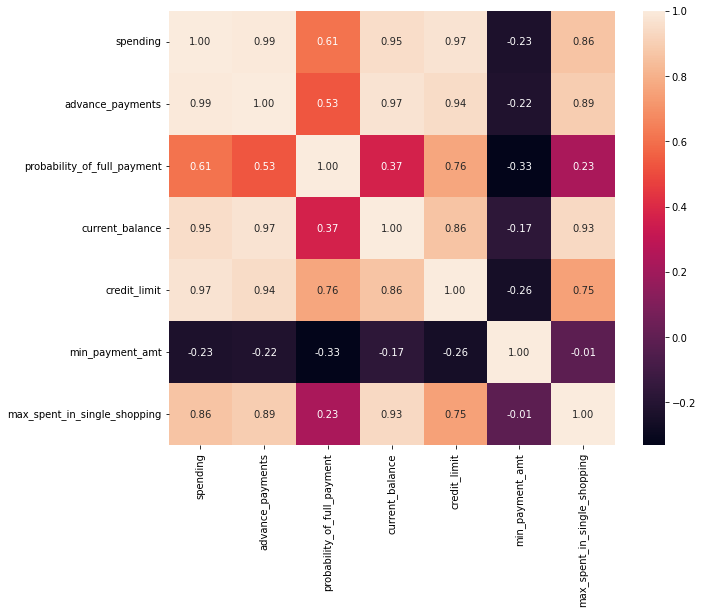

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

In [20]:
df.corr().T

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


In [21]:
from scipy.stats import zscore

In [22]:
df_scaled=df.apply(zscore)

In [23]:
df_scaled.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,9.148766e-16,1.097006e-16,1.243978e-15,-1.089076e-16,-2.994298e-16,5.302637e-16,-1.935489e-15
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00
min,-1.466714e+00,-1.649686e+00,-2.668236e+00,-1.650501e+00,-1.668209e+00,-1.956769e+00,-1.813288e+00
25%,-8.879552e-01,-8.514330e-01,-5.980791e-01,-8.286816e-01,-8.349072e-01,-7.591477e-01,-7.404953e-01
50%,-1.696741e-01,-1.836639e-01,1.039927e-01,-2.376280e-01,-5.733534e-02,-6.746852e-02,-3.774588e-01
75%,8.465989e-01,8.870693e-01,7.116771e-01,7.945947e-01,8.044956e-01,7.123789e-01,9.563941e-01
max,2.181534e+00,2.065260e+00,2.006586e+00,2.367533e+00,2.055112e+00,3.170590e+00,2.328998e+00


In [24]:
Hclust=linkage(df_scaled,method='ward')

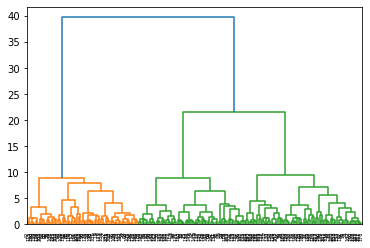

In [25]:
dend=dendrogram(Hclust)

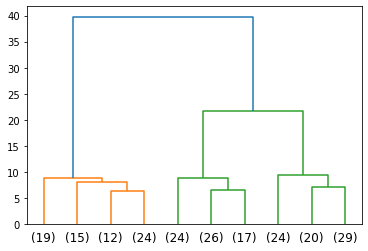

In [26]:
dend = dendrogram(Hclust,truncate_mode='lastp',p = 10)

In [27]:
clusters_1 = fcluster(Hclust, 3, criterion='maxclust')
clusters_1

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [28]:
clusters_2 = fcluster(Hclust, 20, criterion='distance')
clusters_2

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [29]:
np.array_equal(clusters_1,clusters_2)

True

In [30]:
df['H_clusters'] = clusters_1

In [31]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [32]:
df['H_clusters'].value_counts()

3    73
1    70
2    67
Name: H_clusters, dtype: int64

In [33]:
X=StandardScaler()

In [34]:
df_scaled = X.fit_transform(df)

In [35]:
df_scaled

array([[ 1.75435461,  1.81196782,  0.17822987, ..., -0.29880602,
         2.3289982 , -1.22932588],
       [ 0.39358228,  0.25383997,  1.501773  , ..., -0.24280501,
        -0.53858174,  1.19469699],
       [ 1.41330028,  1.42819249,  0.50487353, ..., -0.22147129,
         1.50910692, -1.22932588],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -1.3221578 ,
        -0.83023461,  1.19469699],
       [ 0.43836719,  0.33827054,  1.23027698, ..., -0.95348449,
         0.07123789, -1.22932588],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.70681338,
         0.96047321,  1.19469699]])

In [36]:
k_means = KMeans(n_clusters=2)
k_means.fit(df_scaled)
k_means.inertia_

726.6698839310626

In [37]:
k_means = KMeans(n_clusters=3)
k_means.fit(df_scaled)
k_means.inertia_

442.45237115842224

In [38]:
k_means = KMeans(n_clusters=4)
k_means.fit(df_scaled)
k_means.inertia_

392.2411164416579

In [39]:
wss=[]

In [40]:
for i in range(1,11):
    KM=KMeans(n_clusters=i)
    KM.fit(df_scaled)
    wss.append(KM.inertia_)

In [41]:
wss

[1679.9999999999993,
 726.6698839310626,
 442.45237115842224,
 392.15134518759436,
 345.8178806932608,
 305.7411409857402,
 276.78813740254134,
 255.31620962887888,
 236.20049479981355,
 214.1894800728524]

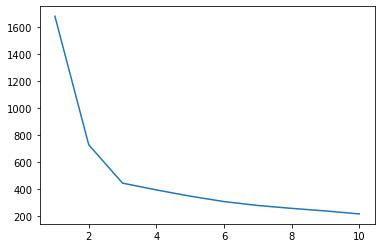

In [42]:
plt.plot(range(1,11),wss)


In [43]:
k_means=KMeans(n_clusters=3)
k_means.fit(df_scaled)
labels = k_means.labels_

In [44]:
df["clus_kmeans"]=labels
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters,clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,1
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0


In [45]:
silhouette_score(df_scaled,labels)

0.47338992675469077

In [46]:
sil_width=silhouette_samples(df_scaled,labels)

In [47]:
df['sil_width']=sil_width
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters,clus_kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0,0.611016
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,1,0.458139
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0,0.689726
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,2,0.536056
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0,0.519094


In [48]:
sil_width.min()

0.009791640022933052

In [49]:
sil_width.max()

0.6897263750279943

In [50]:
df['H_clusters'].value_counts()

3    73
1    70
2    67
Name: H_clusters, dtype: int64

In [51]:
df['clus_kmeans'].value_counts()

1    72
0    70
2    68
Name: clus_kmeans, dtype: int64

In [52]:
df.groupby('H_clusters').mean()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clus_kmeans,sil_width
H_clusters,,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,0.000000,0.559738
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,2.000000,0.468139
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,1.013699,0.395410


In [53]:
df.groupby('clus_kmeans').mean()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters,sil_width
clus_kmeans,,,,,,,,,
0,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,1.000000,0.559738
1,14.237500,14.248889,0.879825,5.482431,3.233500,2.617614,5.085542,3.000000,0.398586
2,11.865882,13.255147,0.847857,5.238015,2.846632,4.909309,5.122353,2.014706,0.463706


### Problem-2

In [54]:
data=pd.read_csv('C:/Users/DELL/Downloads/insurance_part2.csv')

In [55]:
data.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [56]:
data.shape

(3000, 10)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [58]:
data.isna().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [59]:
data.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


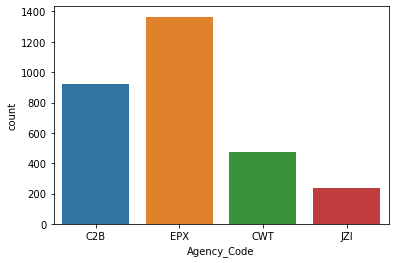

In [60]:
sns.countplot(data=data,x = 'Agency_Code')
plt.show()

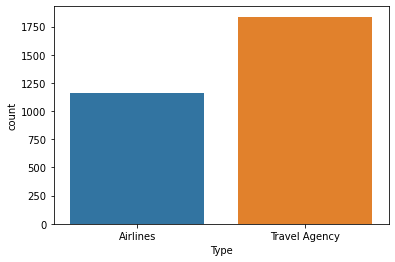

In [61]:
sns.countplot(data=data,x = 'Type')
plt.show()

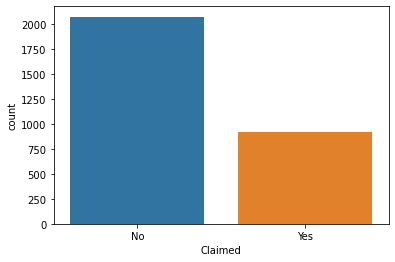

In [62]:
sns.countplot(data=data,x = 'Claimed')
plt.show()

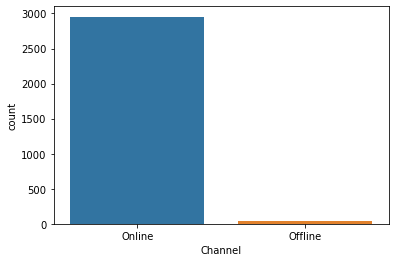

In [63]:
sns.countplot(data=data,x = 'Channel')
plt.show()

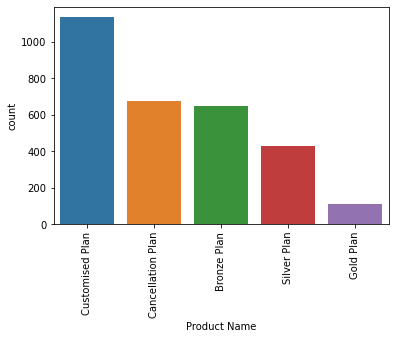

In [64]:
sns.countplot(data=data,x = 'Product Name')
plt.xticks(rotation= 'vertical')
plt.show()

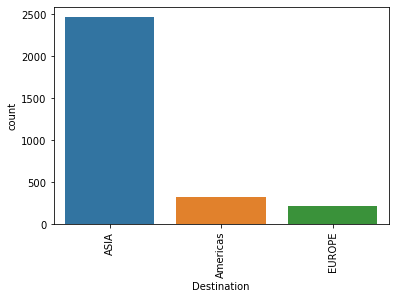

In [65]:
sns.countplot(data=data,x = 'Destination')
plt.xticks(rotation= 'vertical')
plt.show()

In [66]:
data.drop(data.columns[[1,2,3,5,8,9]],axis=1,inplace=True)

In [67]:
len(data.columns)

4

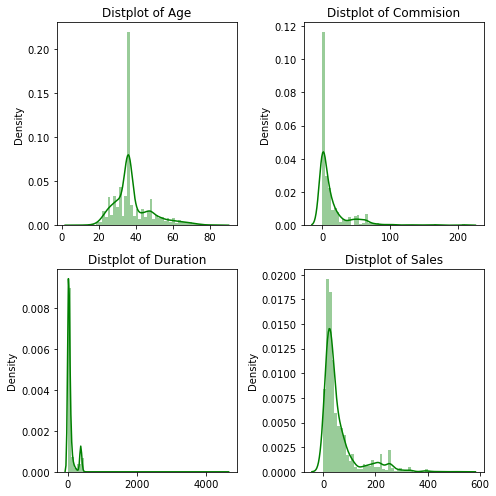

In [68]:
plt.figure(figsize = (7,7))
New_data = data.columns
for i in range(len(New_data)):
    plt.subplot(2, 2,i+1)
    sns.distplot(x = data[New_data[i]],color='green')
    plt.title('Distplot of {}'.format(New_data[i]))
    plt.tight_layout()

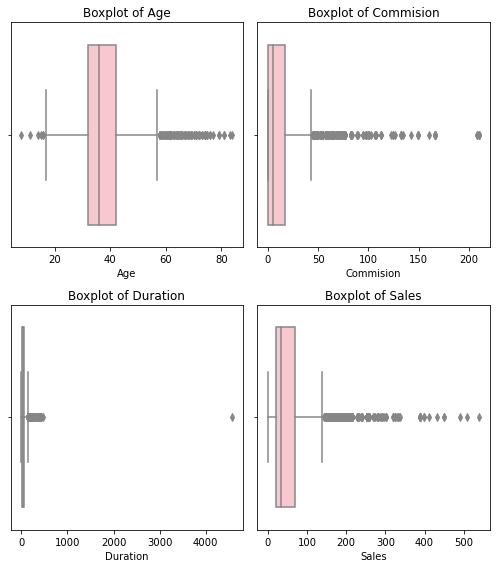

In [69]:
plt.figure(figsize = (7,8))
New_data = data.columns
for i in range(len(New_data)):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x = data[New_data[i]],color='Pink')
    plt.title('Boxplot of {}'.format(New_data[i]))
    plt.tight_layout()

In [70]:
Q1=data['Age'].quantile(q=0.25)
Q3=data['Age'].quantile(q=0.75)
print('Age - 1st Quartile (Q1) is: ',Q1)
print('Age - 3st Quartile (Q3) is: ',Q3)
LL=Q1-1.5*(Q3-Q1)
UL=Q3+1.5*(Q3-Q1)
print('Lower outliers in Age: ',LL)
print('Upper outliers in Age: ',UL)

Age - 1st Quartile (Q1) is:  32.0
Age - 3st Quartile (Q3) is:  42.0
Lower outliers in Age:  17.0
Upper outliers in Age:  57.0


In [71]:
Q1=data['Commision'].quantile(q=0.25)
Q3=data['Commision'].quantile(q=0.75)
print('Commision - 1st Quartile (Q1) is: ',Q1)
print('Commision - 3st Quartile (Q3) is: ',Q3)
LL=Q1-1.5*(Q3-Q1)
UL=Q3+1.5*(Q3-Q1)
print('Lower outliers in Commision: ',LL)
print('Upper outliers in Commision: ',UL)

Commision - 1st Quartile (Q1) is:  0.0
Commision - 3st Quartile (Q3) is:  17.235
Lower outliers in Commision:  -25.8525
Upper outliers in Commision:  43.0875


In [72]:
Q1=data['Duration'].quantile(q=0.25)
Q3=data['Duration'].quantile(q=0.75)
print('Duration - 1st Quartile (Q1) is: ',Q1)
print('Duration - 3st Quartile (Q3) is: ',Q3)
LL=Q1-1.5*(Q3-Q1)
UL=Q3+1.5*(Q3-Q1)
print('Lower outliers in Duration: ',LL)
print('Upper outliers in Duration: ',UL)

Duration - 1st Quartile (Q1) is:  11.0
Duration - 3st Quartile (Q3) is:  63.0
Lower outliers in Duration:  -67.0
Upper outliers in Duration:  141.0


In [73]:
Q1=data['Sales'].quantile(q=0.25)
Q3=data['Sales'].quantile(q=0.75)
print('Sales - 1st Quartile (Q1) is: ',Q1)
print('Sales - 3st Quartile (Q3) is: ',Q3)
LL=Q1-1.5*(Q3-Q1)
UL=Q3+1.5*(Q3-Q1)
print('Lower outliers in Sales: ',LL)
print('Upper outliers in Sales: ',UL)

Sales - 1st Quartile (Q1) is:  20.0
Sales - 3st Quartile (Q3) is:  69.0
Lower outliers in Sales:  -53.5
Upper outliers in Sales:  142.5


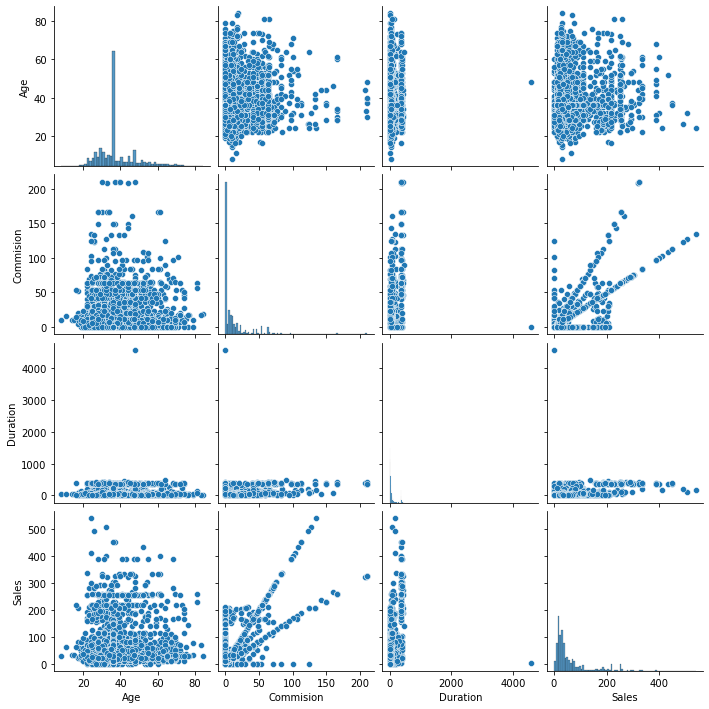

In [74]:
sns.pairplot(data)
plt.show()

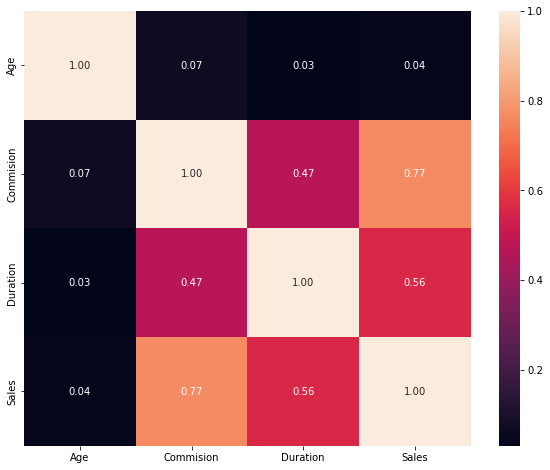

In [75]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,fmt=".2f")
plt.show()

In [76]:
data.corr().T

,Age,Commision,Duration,Sales
Age,1.000000,0.067717,0.030425,0.039455
Commision,0.067717,1.000000,0.471389,0.766505
Duration,0.030425,0.471389,1.000000,0.558930
Sales,0.039455,0.766505,0.558930,1.000000


In [77]:
data=pd.read_csv('C:/Users/DELL/Downloads/insurance_part2.csv')

In [78]:
len(data.columns)

10

In [79]:
for feature in data.columns:
    if data[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(data[feature].unique()))
        print(pd.Categorical(data[feature].unique()).codes)
        data[feature] = pd.Categorical(data[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [81]:
X = data.drop("Claimed",axis=1)
y = data.pop("Claimed")

In [82]:
data.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [83]:
from scipy.stats import zscore
X_scaled=X.apply(zscore)
X_scaled.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,0.947162,-1.314358,-1.256796,-0.542807,0.124788,-0.470051,-0.816433,0.268835,-0.434646
1,-0.199870,0.697928,0.795674,-0.570282,0.124788,-0.268605,-0.569127,0.268835,-0.434646
2,0.086888,-0.308215,0.795674,-0.337133,0.124788,-0.499894,-0.711940,0.268835,1.303937
3,-0.199870,0.697928,0.795674,-0.570282,0.124788,-0.492433,-0.484288,-0.525751,-0.434646
4,-0.486629,1.704071,-1.256796,-0.323003,0.124788,-0.126846,-0.597407,-1.320338,-0.434646


In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X_scaled, y, test_size=.30, random_state=5)

In [85]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)


In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [87]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150], 
    'min_samples_split': [150,300,450],
}
dtcl = DecisionTreeClassifier(random_state=1)
grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [88]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=450,
                       random_state=1)

In [89]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [3, 5, 7, 10,12],
    'min_samples_leaf': [20,30,40,50,60], 
    'min_samples_split': [150,300,450],
}


In [90]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=450,
                       random_state=1)

In [91]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [3.5,4.0,4.5, 5.0,5.5],
    'min_samples_leaf': [40, 42, 44,46,48,50,52,54], 
    'min_samples_split': [250, 270, 280, 290, 300,310],
}


In [92]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=450,
                       random_state=1)

In [93]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [4.85, 4.90,4.95, 5.0,5.05,5.10,5.15],
    'min_samples_leaf': [40, 41, 42, 43, 44], 
    'min_samples_split': [150, 175, 200, 210, 220, 230, 240, 250, 260, 270],
}

In [94]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=450,
                       random_state=1)

In [95]:
from sklearn import tree
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid_dtcl, out_file= tree_regularized ,
                                feature_names = list(X_train),
                                class_names = list(train_char_label))

tree_regularized.close()
dot_data

In [96]:
print (pd.DataFrame(best_grid_dtcl.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.674494
Sales         0.222345
Product Name  0.092149
Commision     0.008008
Duration      0.003005
Age           0.000000
Type          0.000000
Channel       0.000000
Destination   0.000000


In [97]:
ytrain_predict_dtcl = best_grid_dtcl.predict(X_train)
ytest_predict_dtcl = best_grid_dtcl.predict(X_test)

In [98]:
ytest_predict_dtcl
ytest_predict_prob_dtcl=best_grid_dtcl.predict_proba(X_test)
ytest_predict_prob_dtcl
pd.DataFrame(ytest_predict_prob_dtcl).head()

,0,1
0,0.656751,0.343249
1,0.979452,0.020548
2,0.921171,0.078829
3,0.656751,0.343249
4,0.921171,0.078829


In [99]:
param_grid_rfcl = {
    'max_depth': [4,5,6],
    'max_features': [2,3,4,5],
    'min_samples_leaf': [8,9,11,15],
    'min_samples_split': [46,50,55]   
}

rfcl = RandomForestClassifier(random_state=1)
grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 5)

In [100]:
grid_search_rfcl.fit(X_train, train_labels)
print(grid_search_rfcl.best_params_)
best_grid_rfcl = grid_search_rfcl.best_estimator_
best_grid_rfcl

{'max_depth': 6, 'max_features': 4, 'min_samples_leaf': 8, 'min_samples_split': 50}


RandomForestClassifier(max_depth=6, max_features=4, min_samples_leaf=8,
                       min_samples_split=50, random_state=1)

In [101]:
ytrain_predict_rfcl = best_grid_rfcl.predict(X_train)
ytest_predict_rfcl = best_grid_rfcl.predict(X_test)

In [102]:
ytest_predict_rfcl
ytest_predict_prob_rfcl=best_grid_rfcl.predict_proba(X_test)
ytest_predict_prob_rfcl
pd.DataFrame(ytest_predict_prob_rfcl).head()

,0,1
0,0.777642,0.222358
1,0.980005,0.019995
2,0.896432,0.103568
3,0.647552,0.352448
4,0.887602,0.112398


In [103]:
print (pd.DataFrame(best_grid_rfcl.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.331032
Product Name  0.190926
Sales         0.181657
Commision     0.113425
Type          0.070799
Duration      0.063841
Age           0.038955
Destination   0.007602
Channel       0.001762


In [104]:
from sklearn.neural_network import MLPClassifier

In [105]:
param_grid_nnc = {'hidden_layer_sizes': [50,100,200],'max_iter': [250,300,400],'solver': ['adam'],'tol': [0.01]}
nnc = MLPClassifier(random_state=1)
grid_search_nnc = GridSearchCV(estimator = nnc, param_grid = param_grid_nnc, cv = 10)

In [106]:
grid_search_nnc.fit(X_train, train_labels)
grid_search_nnc.best_params_
best_grid_nnc = grid_search_nnc.best_estimator_
best_grid_nnc

MLPClassifier(hidden_layer_sizes=200, max_iter=250, random_state=1, tol=0.01)

In [107]:
ytrain_predict_nnc = best_grid_nnc.predict(X_train)
ytest_predict_nnc = best_grid_nnc.predict(X_test)

In [108]:
ytest_predict_nnc
ytest_predict_prob_nnc=best_grid_nnc.predict_proba(X_test)
ytest_predict_prob_nnc
pd.DataFrame(ytest_predict_prob_nnc).head()

,0,1
0,0.822676,0.177324
1,0.933407,0.066593
2,0.918772,0.081228
3,0.688933,0.311067
4,0.913425,0.086575


AUC: 0.812


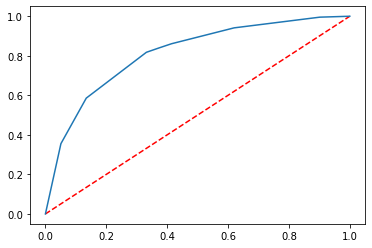

In [109]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
probs_cart = best_grid_dtcl.predict_proba(X_train)
probs_cart = probs_cart[:, 1]
cart_train_auc = roc_auc_score(train_labels, probs_cart)
print('AUC: %.3f' % cart_train_auc)
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--',color='red')
plt.plot(cart_train_fpr, cart_train_tpr)

AUC: 0.800


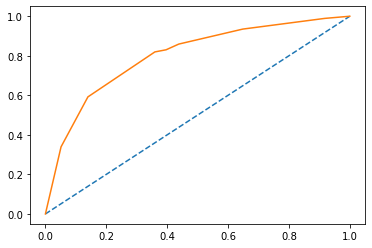

In [110]:
probs_cart = best_grid_dtcl.predict_proba(X_test)
probs_cart = probs_cart[:, 1]
cart_test_auc = roc_auc_score(test_labels, probs_cart)
print('AUC: %.3f' % cart_test_auc)
cart_test_fpr, cart_test_tpr, cart_test_thresholds = roc_curve(test_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr)

In [111]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(train_labels, ytrain_predict_dtcl)

array([[1258,  195],
       [ 268,  379]], dtype=int64)

In [112]:
cart_train_acc=best_grid_dtcl.score(X_train,train_labels) 
cart_train_acc

0.7795238095238095

In [113]:
print(classification_report(train_labels, ytrain_predict_dtcl))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1453
           1       0.66      0.59      0.62       647

    accuracy                           0.78      2100
   macro avg       0.74      0.73      0.73      2100
weighted avg       0.77      0.78      0.78      2100



In [114]:
confusion_matrix(test_labels, ytest_predict_dtcl)

array([[536,  87],
       [113, 164]], dtype=int64)

In [115]:
cart_test_acc=best_grid_dtcl.score(X_test,test_labels)
cart_test_acc

0.7777777777777778

In [116]:
print(classification_report(test_labels, ytest_predict_dtcl))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       623
           1       0.65      0.59      0.62       277

    accuracy                           0.78       900
   macro avg       0.74      0.73      0.73       900
weighted avg       0.77      0.78      0.77       900



In [117]:
confusion_matrix(train_labels,ytrain_predict_rfcl)

array([[1291,  162],
       [ 241,  406]], dtype=int64)

In [118]:
rf_train_acc=best_grid_rfcl.score(X_train,train_labels) 
rf_train_acc

0.8080952380952381

In [119]:
print(classification_report(train_labels,ytrain_predict_rfcl))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1453
           1       0.71      0.63      0.67       647

    accuracy                           0.81      2100
   macro avg       0.78      0.76      0.77      2100
weighted avg       0.80      0.81      0.80      2100



Area under Curve is 0.8586902757286262


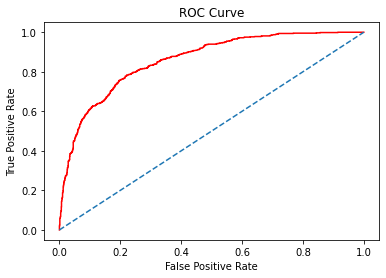

In [120]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid_rfcl.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='red')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
rf_train_auc=roc_auc_score(train_labels,best_grid_rfcl.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

In [121]:
confusion_matrix(test_labels,ytest_predict_rfcl)

array([[547,  76],
       [115, 162]], dtype=int64)

In [122]:
rf_test_acc=best_grid_rfcl.score(X_test,test_labels)
rf_test_acc

0.7877777777777778

In [123]:
print(classification_report(test_labels,ytest_predict_rfcl))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       623
           1       0.68      0.58      0.63       277

    accuracy                           0.79       900
   macro avg       0.75      0.73      0.74       900
weighted avg       0.78      0.79      0.78       900



Area under Curve is 0.8197611417909151


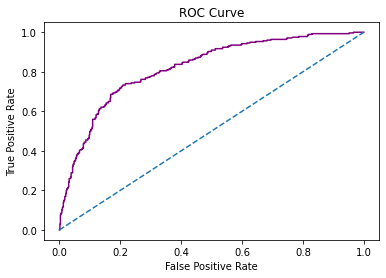

In [124]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid_rfcl.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='purple')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
rf_test_auc=roc_auc_score(test_labels,best_grid_rfcl.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

In [125]:
confusion_matrix(train_labels,ytrain_predict_nnc)

array([[1298,  155],
       [ 315,  332]], dtype=int64)

In [126]:
nn_train_acc=best_grid_nnc.score(X_train,train_labels) 
nn_train_acc

0.7761904761904762

In [127]:
print(classification_report(train_labels,ytrain_predict_nnc))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85      1453
           1       0.68      0.51      0.59       647

    accuracy                           0.78      2100
   macro avg       0.74      0.70      0.72      2100
weighted avg       0.77      0.78      0.77      2100



Area under Curve is 0.8166831721609928


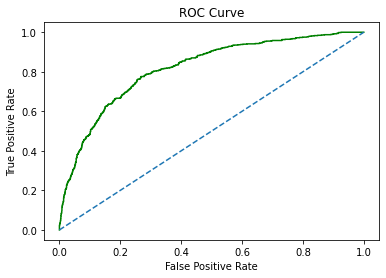

In [128]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid_nnc.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
nn_train_auc=roc_auc_score(train_labels,best_grid_nnc.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

In [129]:
confusion_matrix(test_labels,ytest_predict_nnc)

array([[553,  70],
       [138, 139]], dtype=int64)

In [130]:
nn_test_acc=best_grid_nnc.score(X_test,test_labels)
nn_test_acc

0.7688888888888888

In [131]:
print(classification_report(test_labels,ytest_predict_nnc))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       623
           1       0.67      0.50      0.57       277

    accuracy                           0.77       900
   macro avg       0.73      0.69      0.71       900
weighted avg       0.76      0.77      0.76       900



Area under Curve is 0.8044225275393896


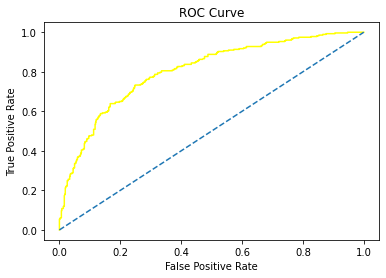

In [132]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid_nnc.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='yellow')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
nn_test_auc=roc_auc_score(test_labels,best_grid_nnc.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

Text(0.5, 1.0, 'ROC')

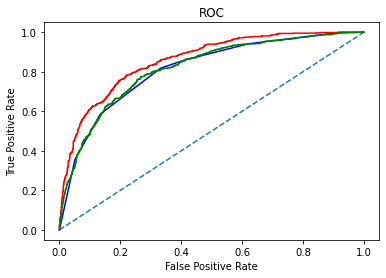

In [133]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='blue')
plt.plot(rf_train_fpr,rf_train_tpr,color='red')
plt.plot(nn_train_fpr,nn_train_tpr,color='green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

Text(0.5, 1.0, 'ROC')

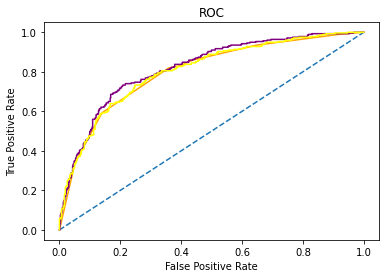

In [134]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='orange')
plt.plot(rf_test_fpr,rf_test_tpr,color='purple')
plt.plot(nn_test_fpr,nn_test_tpr,color='yellow')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')